In [1]:
# SHAP won't show all graphics until shap.initjs() is run. Beware of SHAP calculation times.

import shap
import lime
from lime.lime_tabular import LimeTabularExplainer
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

import pickle

import warnings
warnings.filterwarnings('ignore')

#Visualiser le maximum possible d'information
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

# Imports

In [2]:
filename = 'pickle/model_file.sav'
model = pickle.load(open(filename, 'rb'))

filename = 'pickle/complete.pkl' #train+test set
final = pickle.load(open(filename, 'rb'))

filename = 'pickle/final_file.pkl' #test set
df_test = pickle.load(open(filename, 'rb'))

filename = 'pickle/final_train.pkl' #train set
df_train = pickle.load(open(filename, 'rb'))

# Predictions

In [3]:
#Get feature importances
feature_importances = pd.DataFrame({'feature': final.drop(columns=['TARGET', 'RISK_PROBA']).columns.to_list(), 
                                    'importance': model.feature_importances_}).sort_values('importance', 
                                                                                           ascending=False).reset_index(drop=True)
feature_importances

feature  importance
0   CREDIT_TERM                     1646      
1   EXT_SOURCE_2                    1377      
2   EXT_SOURCE_3                    1275      
3   AMT_ANNUITY_max_PA              1246      
4   YEARS_BIRTH                     1183      
5   YEARS_REGISTRATION              1180      
6   N_PREV_LAST_APPLICATION         1126      
7   YEARS_ID_PUBLISH                1122      
8   YEARS_EMPLOYED                  1086      
9   DAYS_LAST_PHONE_CHANGE          1085      
10  SELLERPLACE_AREA_max_PA         1078      
11  AMT_ANNUITY_min_PA              1036      
12  DAYS_CREDIT_ENDDATE_max_B       1023      
13  EXT_SOURCE_1                    1009      
14  AMT_ANNUITY                     974       
15  AMT_CREDIT_SUM_max_B            974       
16  N_BUREAU_LAST_APPLICATION       942       
17  REGION_POPULATION_RELATIVE      939       
18  CREDIT_INCOME_RATIO             931       
19  BUREAU_CREDIT_DEBT_RATIO_max_B  913       
20  AMT_CREDIT_SUM_min_B            828       
21  AMT_CREDIT                      782       
22  INCOME_PER_PERSON               768       
23  ORGANIZATION_TYPE               638       
24  AMT_INCOME_TOTAL                593       
25  OCCUPATION_TYPE                 518       
26  N_REJECT_RATIO                  507       
27  HOUR_APPR_PROCESS_START         474       
28  N_TOTAL_LOANS                   450       
29  N_BUREAU_LOANS                  445       
30  N_PREV_APPROVED                 338       
31  OBS_30_CNT_SOCIAL_CIRCLE        334       
32  WALLSMATERIAL_MODE              228       
33  NAME_FAMILY_STATUS              217       
34  NAME_EDUCATION_TYPE             182       
35  CODE_GENDER                     148       
36  FLAG_OWN_CAR                    137       
37  NAME_CONTRACT_TYPE              97        
38  CNT_CHILDREN                    92        
39  NAME_HOUSING_TYPE               79

In [4]:
pipe = make_pipeline(model)
# y_pred = pipe.predict(final.drop(columns=['TARGET', 'RISK_PROBA']))
# y_proba = pipe.predict_proba(final.drop(columns=['TARGET', 'RISK_PROBA']))

pred_distrib = final['TARGET'].value_counts()
pred_distrib

y_pred = final['TARGET']
y_proba = final['RISK_PROBA']
pred_good = (y_pred == 0).sum()
pred_fail = (y_pred == 1).sum()

failure_ratio = pred_fail/(pred_good+pred_fail)
print('Failure Ratio: {}%'.format(round(100*failure_ratio, 2)))

Failure Ratio: 16.0%


In [5]:
final[final['TARGET'] == 1].sample()

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  CNT_CHILDREN  \
290281  0                   0            0             0              

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  NAME_EDUCATION_TYPE  \
290281  112500.0          291915.0    21370.5      0                     

        NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
290281  0                   0                  0.020248                     

        OCCUPATION_TYPE  HOUR_APPR_PROCESS_START  ORGANIZATION_TYPE  \
290281  4                9                        5                   

        WALLSMATERIAL_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
290281  0                   0.0                      -313.0                    

        YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
290281  62.3125      4.835938        25.234375           14.070312          

        CREDIT_INCOME_RATIO  INCOME_PER_PERSON  CREDIT_TERM  N_PREV_APPROVED  \
290281  2.595703             112500.0           13.65625     1.0               

        N_PREV_LAST_APPLICATION  N_REJECT_RATIO  N_BUREAU_LOANS  \
290281 -313.0                    0.5             3.0              

        N_BUREAU_LAST_APPLICATION  N_TOTAL_LOANS  DAYS_CREDIT_ENDDATE_max_B  \
290281 -98.0                       5.0            268.0                       

        AMT_CREDIT_SUM_min_B  AMT_CREDIT_SUM_max_B  \
290281  50448.421875          105882.34375           

        BUREAU_CREDIT_DEBT_RATIO_max_B  AMT_ANNUITY_min_PA  \
290281  0.784184                        8694.629883          

        AMT_ANNUITY_max_PA  SELLERPLACE_AREA_max_PA  EXT_SOURCE_1  \
290281  8694.629883         100.0                    0.506836       

        EXT_SOURCE_2  EXT_SOURCE_3  TARGET  RISK_PROBA  
290281  0.28833       0.134277      1       0.918457

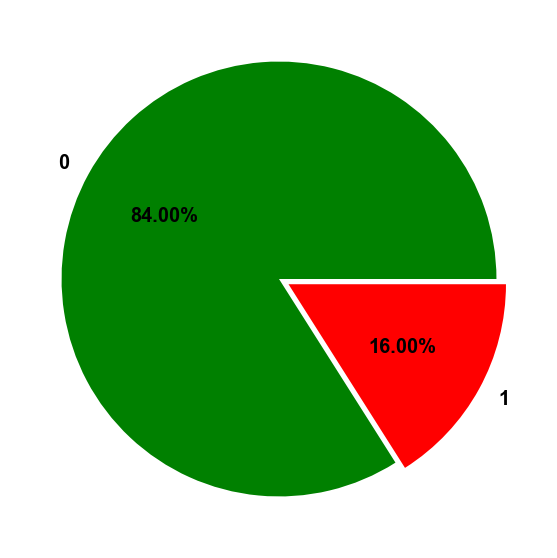

In [6]:
plt.figure(figsize=(10, 10))
plt.style.use('seaborn-white')
plt.pie(pred_distrib,
        explode=(0, 0.05),
        colors=('green', 'red'),
        autopct='%1.2f%%',
        textprops={'weight': 'bold',
                   'fontsize': 20,
                   'color': 'black',
                  },
        labels=pred_distrib.index,
       )
plt.show()

# Prepare data

In [7]:
im_data = final.drop(columns=['TARGET', 'RISK_PROBA']) #import data

In [8]:
im_data.sample(5)

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  CNT_CHILDREN  \
190835  1                   0            0             0              
186323  0                   1            0             0              
221323  0                   1            0             1              
336007  1                   1            0             0              
379967  1                   0            0             0              

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  NAME_EDUCATION_TYPE  \
190835  220500.0          180000.0    9000.0       1                     
186323  90000.0           161730.0    12829.5      0                     
221323  166500.0          808650.0    26217.0      0                     
336007  270000.0          450000.0    22500.0      0                     
379967  144000.0          337500.0    16875.0      1                     

        NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
190835  1                   0                  0.031342                     
186323  0                   0                  0.028656                     
221323  4                   0                  0.046234                     
336007  0                   0                  0.046234                     
379967  1                   0                  0.006233                     

        OCCUPATION_TYPE  HOUR_APPR_PROCESS_START  ORGANIZATION_TYPE  \
190835  1                14                       18                  
186323  10               14                       0                   
221323  6                18                       9                   
336007  4                11                       5                   
379967  3                14                       2                   

        WALLSMATERIAL_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
190835  2                   0.0                      -337.0                    
186323  0                   2.0                       0.0                      
221323 -1                   0.0                      -3224.0                   
336007  2                   0.0                      -344.0                    
379967  0                   2.0                      -1285.0                   

        YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
190835  27.15625     4.593750        12.398438           7.085938           
186323  27.50000     5.921875        6.968750            7.417969           
221323  32.96875     0.561523        0.016434            11.054688          
336007  59.31250     4.515625        43.031250           13.984375          
379967  57.31250     0.493164        5.808594            4.316406           

        CREDIT_INCOME_RATIO  INCOME_PER_PERSON  CREDIT_TERM  N_PREV_APPROVED  \
190835  0.816406             110250.0           20.000000    1.0               
186323  1.796875             90000.0            12.609375    1.0               
221323  4.855469             83250.0            30.843750    3.0               
336007  1.666992             270000.0           20.000000    5.0               
379967  2.343750             72000.0            20.000000    6.0               

        N_PREV_LAST_APPLICATION  N_REJECT_RATIO  N_BUREAU_LOANS  \
190835 -337.0                    0.000000        2.0              
186323 -878.0                    0.799805        1.0              
221323 -2922.0                   0.000000        5.0              
336007 -175.0                    0.166626        3.0              
379967 -430.0                    0.000000        9.0              

        N_BUREAU_LAST_APPLICATION  N_TOTAL_LOANS  DAYS_CREDIT_ENDDATE_max_B  \
190835 -197.0                      3.0           -150.0                       
186323 -1831.0                     6.0           -1479.0                      
221323 -461.0                      5.0            31168.0                     
336007 -371.0                      9.0            961.0                       
379967 -79.0           

# LIME: Local Interpretable Model-agnostic Explanations

Blackbox models are out of fashion. Nowadays we want to know what's going on inside them. That's what LIME (or SHAP) tries to uncover. Without knowing what going on isnide a model it's impossible to tweak or to improve it.

In a nutshell, LIME is used to explain predictions of a machine learning model. The explanations should help to understand why the model behaves the way it does. If a model isn't behaving as expected, there is a good chance the error comes from the data preparation phase.

To interprete a model, it needs to be trained. All attributes need to be numeric and without any missing values, then we can do the train/test split. Finally, in our case, we used LGBMClassifier for the classification.

Now, we import LIME to start interpreting.

In [9]:
help(LimeTabularExplainer)

Help on class LimeTabularExplainer in module lime.lime_tabular:

class LimeTabularExplainer(builtins.object)
 |  LimeTabularExplainer(training_data, mode='classification', training_labels=None, feature_names=None, categorical_features=None, categorical_names=None, kernel_width=None, kernel=None, verbose=False, class_names=None, feature_selection='auto', discretize_continuous=True, discretizer='quartile', sample_around_instance=False, random_state=None, training_data_stats=None)
 |  
 |  Explains predictions on tabular (i.e. matrix) data.
 |  For numerical features, perturb them by sampling from a Normal(0,1) and
 |  doing the inverse operation of mean-centering and scaling, according to the
 |  means and stds in the training data. For categorical features, perturb by
 |  sampling according to the training distribution, and making a binary
 |  feature that is 1 when the value is the same as the instance being
 |  explained.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, training

In [10]:
col_names = im_data.columns.values.tolist()
categorical_features = []
for i, col in enumerate(col_names):
    if im_data[col].nunique() == 2:
        categorical_features.append(i)
categorical_names = {}
for feature in categorical_features:
    categorical_names[feature] = np.array([0, 1])

print('Categorical columns:', categorical_features)

Categorical columns: [0, 1, 2]


In [11]:
class_names = ['0: Low Risk','1: Failure Risk'] #distinct classes from the target variable

# create explainer
explainer = LimeTabularExplainer(training_data = im_data.values, #Needs to be in Numpy array format
                                 mode='classification',
                                 training_labels = final['TARGET'],
                                 feature_names = im_data.columns,
                                 class_names=class_names,
#                                  categorical_features=categorical_features,
                                )

In [12]:
explainer

In [13]:
# lime explanation with i as SK_ID_CURR value (application - client)
def explanation(i):
    exp = explainer.explain_instance(
        im_data.loc[i].values,
        pipe.predict_proba,
        num_features=im_data.shape[1])
    exp.show_in_notebook(predict_proba=True, 
                         show_predicted_value=True, 
                         show_table=True, 
                         show_all=False,
                        )
    return exp

In [14]:
# sample
import random
rand_sample = random.randint(im_data.index.min(), im_data.index.max())

exp_test = explanation(rand_sample)

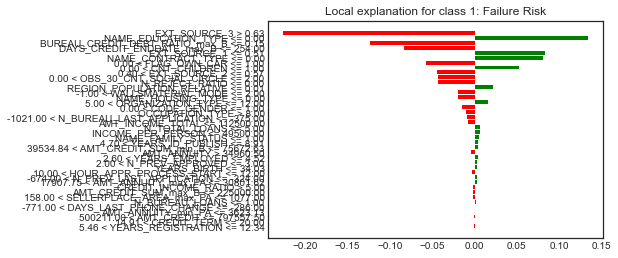

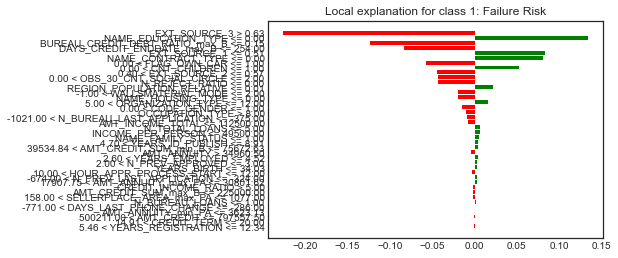

In [15]:
exp_test.as_pyplot_figure()

Green features support the prediction but we're looking for Class 1, therefore we need to revert the green and red features since we're looking for "failure to repay the loan". By doing this, we're inversing the correlation colors: red means positively correlated and green means negatively correlate with Class 1.

Text(0.5, 1.0, 'Local explanation for class 1: Failure Risk')

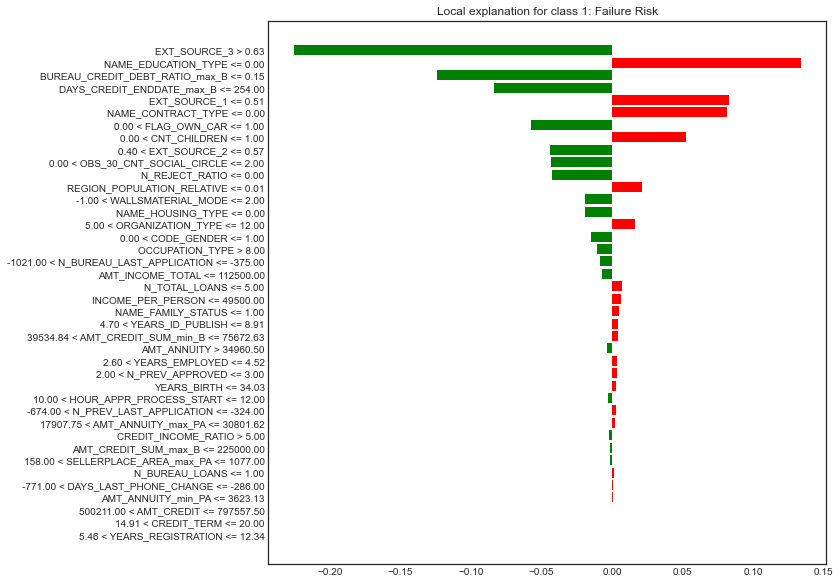

In [16]:
exp = exp_test.as_list()

vals = [x[1] for x in exp]
names = [x[0] for x in exp]

vals.reverse()
names.reverse()

pos = np.arange(len(exp)) #position

plt.figure(figsize=(10, 10))
plt.style.use('seaborn-white')

colors = ['red' if x > 0 else 'green' for x in vals]

plt.barh(pos, vals, align='center', color=colors)
plt.yticks(pos, names)
plt.title('Local explanation for class 1: Failure Risk') #we copy the name from the LIME output

In [17]:
map_test = exp_test.as_map()
cols = [item[0] for item in map_test[1]]
features_to_show = im_data.columns[cols].tolist()
df_lime = im_data.filter(features_to_show)
df_lime.loc[[rand_sample]]

EXT_SOURCE_3  NAME_EDUCATION_TYPE  BUREAU_CREDIT_DEBT_RATIO_max_B  \
229531  0.722168      0                    0.0                              

        DAYS_CREDIT_ENDDATE_max_B  EXT_SOURCE_1  NAME_CONTRACT_TYPE  \
229531 -781.0                      0.441162      0                    

        FLAG_OWN_CAR  CNT_CHILDREN  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
229531  1             1             0.424561      1.0                        

        N_REJECT_RATIO  REGION_POPULATION_RELATIVE  WALLSMATERIAL_MODE  \
229531  0.0             0.008476                    2                    

        NAME_HOUSING_TYPE  ORGANIZATION_TYPE  CODE_GENDER  OCCUPATION_TYPE  \
229531  0                  7                  1            19                

        N_BUREAU_LAST_APPLICATION  AMT_INCOME_TOTAL  N_TOTAL_LOANS  \
229531 -871.0                      67500.0           4.0             

        INCOME_PER_PERSON  NAME_FAMILY_STATUS  YEARS_ID_PUBLISH  \
229531  22500.0            1                   6.890625           

        AMT_CREDIT_SUM_min_B  AMT_ANNUITY  YEARS_EMPLOYED  N_PREV_APPROVED  \
229531  52011.226562          36747.0      3.865234        3.0               

        YEARS_BIRTH  HOUR_APPR_PROCESS_START  N_PREV_LAST_APPLICATION  \
229531  27.65625     12                      -461.0                     

        AMT_ANNUITY_max_PA  CREDIT_INCOME_RATIO  AMT_CREDIT_SUM_max_B  \
229531  17936.324219        10.0                 52011.226562           

        SELLERPLACE_AREA_max_PA  N_BUREAU_LOANS  DAYS_LAST_PHONE_CHANGE  \
229531  900.0                    1.0            -766.0                    

        AMT_ANNUITY_min_PA  AMT_CREDIT  CREDIT_TERM  YEARS_REGISTRATION  
229531  2250.0              675000.0    18.375       6.890625

But can we get something to compare clients?

## Comparing classes

We'll check with a violinplot the class distribution for each feature.

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

df_lime_minmax = pd.DataFrame(MinMaxScaler().fit_transform(df_lime.values), index=df_lime.index, columns=df_lime.columns)
minmax = MinMaxScaler().fit_transform(df_lime.values)
minmax_quantile = QuantileTransformer().fit_transform(minmax)
df_lime_quantile = pd.DataFrame(minmax_quantile, index=df_lime.index, columns=df_lime.columns)

<AxesSubplot:xlabel='value', ylabel='features'>

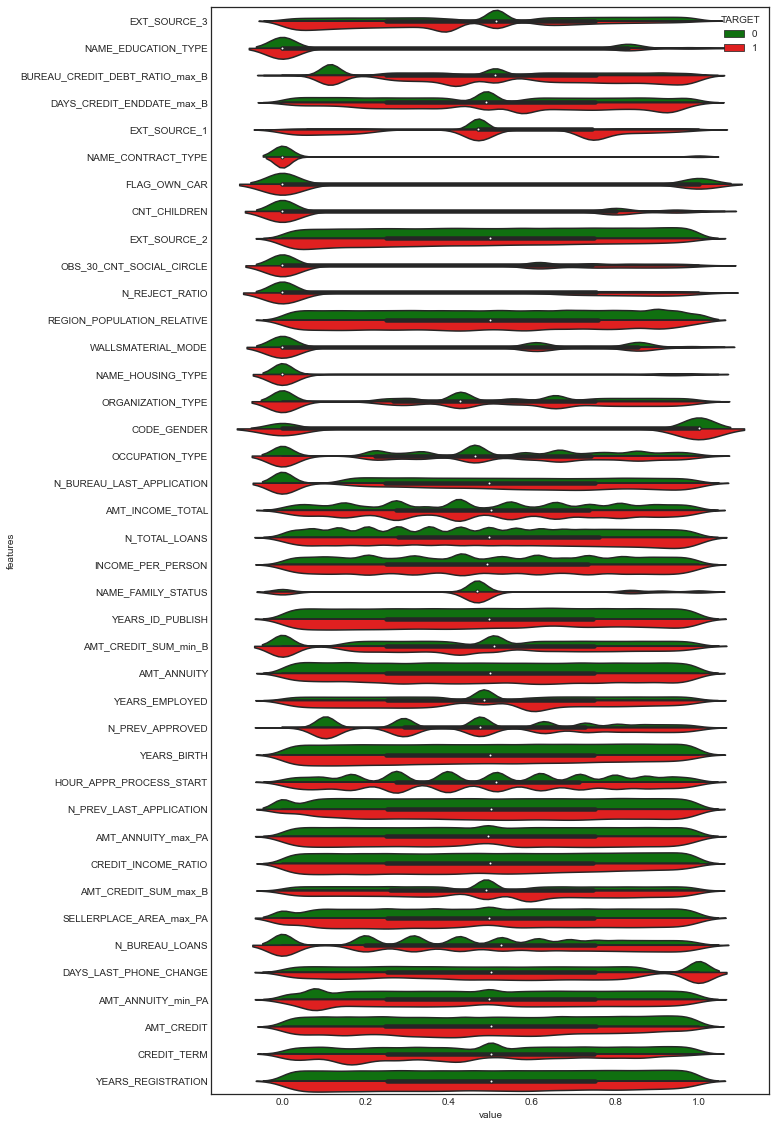

In [19]:
y = final['TARGET']
data = pd.concat([y, df_lime_quantile], axis=1)
data = pd.melt(data, id_vars='TARGET',
               var_name='features',
               value_name='value')

plt.figure(figsize=(10,20))
sns.violinplot(x='value', 
               y='features', 
               hue='TARGET', 
               palette=['green', 'red'], 
               data=data, 
               split=True, 
               scale='width',
              )

It's complicated to compare clients values with this kind of view...

## Neighbors

A more local comparison between clients.

In [20]:
df_lime.head()

EXT_SOURCE_3  NAME_EDUCATION_TYPE  BUREAU_CREDIT_DEBT_RATIO_max_B  \
100001  0.159546      1                    0.987402                         
100002  0.139404      0                    0.546179                         
100003  0.535156      1                    0.000000                         
100004  0.729492      0                    0.000000                         
100005  0.432861      0                    0.954793                         

        DAYS_CREDIT_ENDDATE_max_B  EXT_SOURCE_1  NAME_CONTRACT_TYPE  \
100001  1778.0                     0.752441      0                    
100002  780.0                      0.083008      0                    
100003  1216.0                     0.311279      0                    
100004 -382.0                      0.505859      1                    
100005  1324.0                     0.564941      0                    

        FLAG_OWN_CAR  CNT_CHILDREN  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
100001  0             0             0.789551      0.0                        
100002  0             0             0.262939      2.0                        
100003  0             0             0.622070      1.0                        
100004  1             0             0.556152      0.0                        
100005  0             0             0.291748      0.0                        

        N_REJECT_RATIO  REGION_POPULATION_RELATIVE  WALLSMATERIAL_MODE  \
100001  0.0             0.018845                    0                    
100002  0.0             0.018799                    0                    
100003  0.0             0.003542                    1                    
100004  0.0             0.010033                   -1                    
100005  0.0             0.035797                   -1                    

        NAME_HOUSING_TYPE  ORGANIZATION_TYPE  CODE_GENDER  OCCUPATION_TYPE  \
100001  0                  13                 1            12                
100002  0                  0                  0            0                 
100003  0                  1                  1            1                 
100004  0                  2                  0            0                 
100005  0                  9                  0            17                

        N_BUREAU_LAST_APPLICATION  AMT_INCOME_TOTAL  N_TOTAL_LOANS  \
100001 -49.0                       135000.0          8.0             
100002 -103.0                      202500.0          9.0             
100003 -606.0                      270000.0          7.0             
100004 -408.0                      67500.0           3.0             
100005 -62.0                       99000.0           5.0             

        INCOME_PER_PERSON  NAME_FAMILY_STATUS  YEARS_ID_PUBLISH  \
100001  67500.0            1                   2.224609           
100002  202500.0           0                   5.808594           
100003  135000.0           1                   0.797363           
100004  67500.0            0                   6.933594           
100005  49500.0            1                   4.445312           

        AMT_CREDIT_SUM_min_B  AMT_ANNUITY  YEARS_EMPLOYED  N_PREV_APPROVED  \
100001  85500.0               20560.5      6.378906        1.0               
100002  0.0                   24700.5      1.745117        1.0               
100003  22248.0               35698.5      3.253906        3.0               
100004  94500.0               6750.0       0.616211        1.0               
100005  29826.0               17370.0      12.242188       2.0               

        YEARS_BIRTH  HOUR_APPR_PROCESS_START  N_PREV_LAST_APPLICATION  \
100001  52.718750    18                      -1740.0                    
100002  25.921875    10                      -606.0                     
100003  45.937500    11                      -746.0                     
100004  52.187500    9                       -815.0                     
100005  49.500000    9                       -315.0                     

   

In [21]:
from sklearn.neighbors import NearestNeighbors
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

n_nn = 10

nearest_neighbors = NearestNeighbors(n_neighbors=n_nn, radius=0.3)
nearest_neighbors.fit(df_lime)

neighbors = nearest_neighbors.kneighbors(X=df_lime.loc[[rand_sample]], #current observation
                                         n_neighbors=n_nn+1, #it gives the X value in the 0 position so we need one more
                                         return_distance=False)

neighbors = np.delete(neighbors, 0)

df_lime['TARGET'] = final['TARGET']

neighbors_values_int = df_lime.iloc[neighbors].select_dtypes(include=['int8']).mean().round(0)
neighbors_values_float = df_lime.iloc[neighbors].select_dtypes(include=['float16', 'float32']).mean()
neighbors_values = pd.concat([neighbors_values_int, neighbors_values_float]).reindex(df_lime.columns.tolist())

neighbors_values = pd.DataFrame(neighbors_values,
                                index=df_lime.columns, 
                                columns=['neighbors_mean'])

neighbors_values

neighbors_mean
EXT_SOURCE_3                    0.583008      
NAME_EDUCATION_TYPE             0.000000      
BUREAU_CREDIT_DEBT_RATIO_max_B  0.432419      
DAYS_CREDIT_ENDDATE_max_B       920.000000    
EXT_SOURCE_1                    0.549316      
NAME_CONTRACT_TYPE              0.000000      
FLAG_OWN_CAR                    0.000000      
CNT_CHILDREN                    1.000000      
EXT_SOURCE_2                    0.528809      
OBS_30_CNT_SOCIAL_CIRCLE        1.299805      
N_REJECT_RATIO                  0.057678      
REGION_POPULATION_RELATIVE      0.019730      
WALLSMATERIAL_MODE             -1.000000      
NAME_HOUSING_TYPE               0.000000      
ORGANIZATION_TYPE               9.000000      
CODE_GENDER                     1.000000      
OCCUPATION_TYPE                 6.000000      
N_BUREAU_LAST_APPLICATION      -973.500000    
AMT_INCOME_TOTAL                71325.000000  
N_TOTAL_LOANS                   5.398438      
INCOME_PER_PERSON               26887.500000  
NAME_FAMILY_STATUS              1.000000      
YEARS_ID_PUBLISH                9.140625      
AMT_CREDIT_SUM_min_B            50594.664062  
AMT_ANNUITY                     26099.550781  
YEARS_EMPLOYED                  8.296875      
N_PREV_APPROVED                 3.800781      
YEARS_BIRTH                     48.312500     
HOUR_APPR_PROCESS_START         12.000000     
N_PREV_LAST_APPLICATION        -973.000000    
AMT_ANNUITY_max_PA              15637.806641  
CREDIT_INCOME_RATIO             9.671875      
AMT_CREDIT_SUM_max_B            55758.687500  
SELLERPLACE_AREA_max_PA         494.299988    
N_BUREAU_LOANS                  1.599609      
DAYS_LAST_PHONE_CHANGE         -1395.000000   
AMT_ANNUITY_min_PA              5370.305176   
AMT_CREDIT                      675716.375000 
CREDIT_TERM                     26.625000     
YEARS_REGISTRATION              18.906250     
TARGET                          0.000000

In [22]:
client_values = df_lime.loc[[rand_sample]].T
client_values.columns = ['client'] #SK_ID_CURR
client_values

client
EXT_SOURCE_3                    0.722168     
NAME_EDUCATION_TYPE             0.000000     
BUREAU_CREDIT_DEBT_RATIO_max_B  0.000000     
DAYS_CREDIT_ENDDATE_max_B      -781.000000   
EXT_SOURCE_1                    0.441162     
NAME_CONTRACT_TYPE              0.000000     
FLAG_OWN_CAR                    1.000000     
CNT_CHILDREN                    1.000000     
EXT_SOURCE_2                    0.424561     
OBS_30_CNT_SOCIAL_CIRCLE        1.000000     
N_REJECT_RATIO                  0.000000     
REGION_POPULATION_RELATIVE      0.008476     
WALLSMATERIAL_MODE              2.000000     
NAME_HOUSING_TYPE               0.000000     
ORGANIZATION_TYPE               7.000000     
CODE_GENDER                     1.000000     
OCCUPATION_TYPE                 19.000000    
N_BUREAU_LAST_APPLICATION      -871.000000   
AMT_INCOME_TOTAL                67500.000000 
N_TOTAL_LOANS                   4.000000     
INCOME_PER_PERSON               22500.000000 
NAME_FAMILY_STATUS              1.000000     
YEARS_ID_PUBLISH                6.890625     
AMT_CREDIT_SUM_min_B            52011.226562 
AMT_ANNUITY                     36747.000000 
YEARS_EMPLOYED                  3.865234     
N_PREV_APPROVED                 3.000000     
YEARS_BIRTH                     27.656250    
HOUR_APPR_PROCESS_START         12.000000    
N_PREV_LAST_APPLICATION        -461.000000   
AMT_ANNUITY_max_PA              17936.324219 
CREDIT_INCOME_RATIO             10.000000    
AMT_CREDIT_SUM_max_B            52011.226562 
SELLERPLACE_AREA_max_PA         900.000000   
N_BUREAU_LOANS                  1.000000     
DAYS_LAST_PHONE_CHANGE         -766.000000   
AMT_ANNUITY_min_PA              2250.000000  
AMT_CREDIT                      675000.000000
CREDIT_TERM                     18.375000    
YEARS_REGISTRATION              6.890625     
TARGET                          0.000000

In [23]:
class_1_values_int = df_lime[df_lime['TARGET'] == 1].select_dtypes(include=['int8']).mean().round(0)
class_1_values_float = df_lime[df_lime['TARGET'] == 1].select_dtypes(include=['float16', 'float32']).mean()
class_1_values = pd.concat([class_1_values_int, class_1_values_float]).reindex(df_lime.columns.tolist())
class_1_values = pd.DataFrame(class_1_values, 
                              index=df_lime.columns,
                              columns=['class_1_mean'])

class_0_values_int = df_lime[df_lime['TARGET'] == 0].select_dtypes(include=['int8']).mean().round(0)
class_0_values_float = df_lime[df_lime['TARGET'] == 0].select_dtypes(include=['float16', 'float32']).mean()
class_0_values = pd.concat([class_0_values_int, class_0_values_float]).reindex(df_lime.columns.tolist())
class_0_values = pd.DataFrame(class_0_values, 
                              index=df_lime.columns,
                              columns=['class_0_mean'])

classes_values = pd.concat([client_values, neighbors_values, class_0_values, class_1_values], axis=1)
classes_values.replace([-np.inf, np.inf], 1, inplace=True)
classes_values.fillna(0, inplace=True)

In [24]:
classes_values.T

EXT_SOURCE_3  NAME_EDUCATION_TYPE  \
client          0.722168      0.0                   
neighbors_mean  0.583008      0.0                   
class_0_mean    0.000000      0.0                   
class_1_mean    0.430664      0.0                   

                BUREAU_CREDIT_DEBT_RATIO_max_B  DAYS_CREDIT_ENDDATE_max_B  \
client          0.000000                       -781.0                       
neighbors_mean  0.432419                        920.0                       
class_0_mean    427.315369                      0.0                         
class_1_mean    416.727936                      1.0                         

                EXT_SOURCE_1  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  CNT_CHILDREN  \
client          0.441162      0.0                 1.0           1.0            
neighbors_mean  0.549316      0.0                 0.0           1.0            
class_0_mean    0.000000      0.0                 0.0           0.0            
class_1_mean    0.468506      0.0                 0.0           0.0            

                EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  N_REJECT_RATIO  \
client          0.424561      1.000000                  0.000000         
neighbors_mean  0.528809      1.299805                  0.057678         
class_0_mean    0.000000      0.000000                  0.000000         
class_1_mean    0.458496      1.000000                  0.156128         

                REGION_POPULATION_RELATIVE  WALLSMATERIAL_MODE  \
client          0.008476                    2.0                  
neighbors_mean  0.019730                   -1.0                  
class_0_mean    0.000000                    0.0                  
class_1_mean    0.019852                    0.0                  

                NAME_HOUSING_TYPE  ORGANIZATION_TYPE  CODE_GENDER  \
client          0.0                7.0                1.0           
neighbors_mean  0.0                9.0                1.0           
class_0_mean    0.0                9.0                1.0           
class_1_mean    0.0                10.0               1.0           

                OCCUPATION_TYPE  N_BUREAU_LAST_APPLICATION  AMT_INCOME_TOTAL  \
client          19.0            -871.0                      67500.000000       
neighbors_mean  6.0             -973.5                      71325.000000       
class_0_mean    5.0              0.0                        169752.984375      
class_1_mean    5.0              1.0                        171796.609375      

                N_TOTAL_LOANS  INCOME_PER_PERSON  NAME_FAMILY_STATUS  \
client          4.000000       22500.000000       1.0                  
neighbors_mean  5.398438       26887.500000       1.0                  
class_0_mean    0.000000       93691.367188       1.0                  
class_1_mean    1.000000       94311.992188       1.0                  

                YEARS_ID_PUBLISH  AMT_CREDIT_SUM_min_B   AMT_ANNUITY  \
client          6.890625          52011.226562          36747.000000   
neighbors_mean  9.140625          50594.664062          26099.550781   
class_0_mean    0.000000          111122.585938         27394.472656   
class_1_mean    1.000000          89511.632812          27599.570312   

                YEARS_EMPLOYED  N_PREV_APPROVED  YEARS_BIRTH  \
client          3.865234        3.000000         27.65625      
neighbors_mean  8.296875        3.800781         48.31250      
class_0_mean    0.000000        0.000000         0.00000       
class_1_mean    1.000000        1.000000         1.00000       

                HOUR_APPR_PROCESS_START  N_PREV_LAST_APPLICATION  \
client          12.0                    -461.0                     
neighbors_mean  12.0                    -973.0                     
class_0_mean    12.0                     0.0                       
class_1_mean    12.0                     1.0                       

                AMT_ANNUITY_max_PA  CREDIT_INCOME_RATIO  AMT_CREDIT_SUM_max_B  \
client          17936.324219        10.000000    

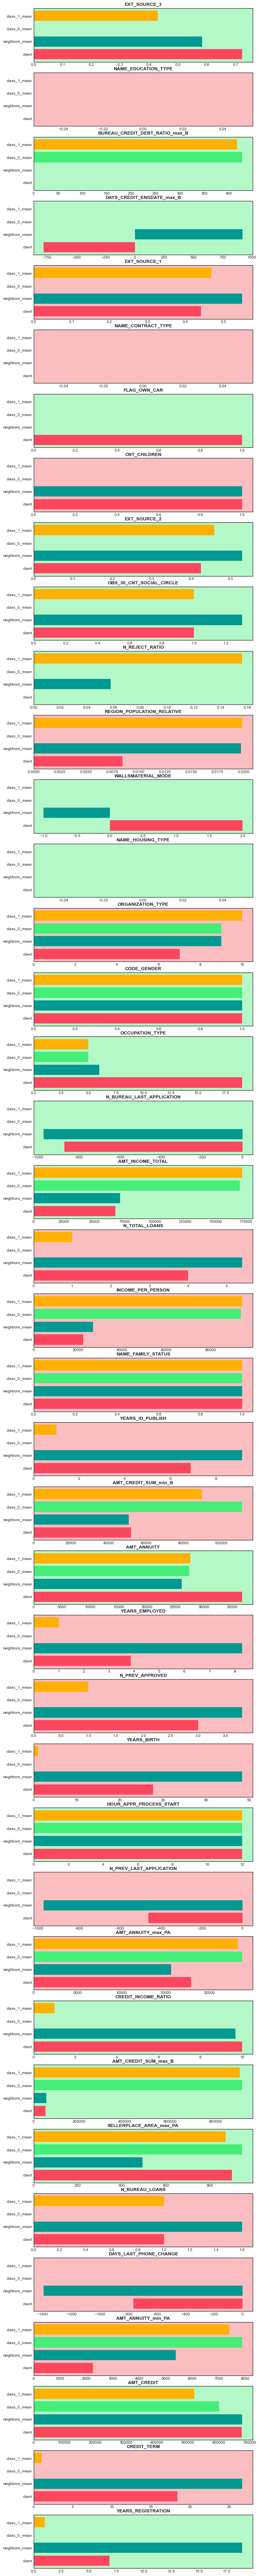

In [25]:
#Groups comparisons

vals = [x[1] for x in exp]
names = [x[0] for x in exp]
face_colors = ['#FABEC0' if x > 0 else '#B4F8C8' for x in vals]

colors = ('#FB475E', '#019992', '#44EE77', '#FFB001')

fig, ax = plt.subplots(classes_values.shape[0]-1, 
                        sharey='row', 
                        figsize=(10, 120))

for i in np.arange(0, classes_values.shape[0]-1):
    ax[i].barh(classes_values.T.index,
               classes_values.T.iloc[:, i],
               color=colors)
    ax[i].set_title(str(classes_values.index[i]), fontweight="bold")
    ax[i].patch.set_facecolor(face_colors[i])
plt.show()

# SHAP: SHapely Additive exPlanations

Another solution to blackbox models is the game-theoretic aprroach of SHAP to explain the output of any machine learning model with Shapely values (measures of contributions each feature has in the model).

Again, to interprete a model, it needs to be trained. All attributes need to be numeric and without any missing values, then we can do the train/test split. Finally, in our case, we used LGBMClassifier for the classification.

Now, we import SHAP to start interpreting.

In [26]:
help(shap.TreeExplainer)

Help on class Tree in module shap.explainers._tree:

class Tree(shap.explainers._explainer.Explainer)
 |  Tree(model, data=None, model_output='raw', feature_perturbation='interventional', feature_names=None, **deprecated_options)
 |  
 |  Uses Tree SHAP algorithms to explain the output of ensemble tree models.
 |  
 |  Tree SHAP is a fast and exact method to estimate SHAP values for tree models and ensembles of trees,
 |  under several different possible assumptions about feature dependence. It depends on fast C++
 |  implementations either inside an externel model package or in the local compiled C extention.
 |  
 |  Method resolution order:
 |      Tree
 |      shap.explainers._explainer.Explainer
 |      shap._serializable.Serializable
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, X, y=None, interactions=False, check_additivity=True)
 |      Explains the output of model(*args), where args is a list of parallel iteratable datasets.
 |      
 |      N

In [27]:
explainer_shap = shap.TreeExplainer(model=model,
                                    data=im_data.values,
#                                     model_output=' probability',
                                   ) #SHAP documentation for more details
explainer_shap

In [28]:
shap_values = explainer_shap.shap_values(im_data.values)

100%|===================| 356187/356251 [73:58<00:00]        

In [29]:
shap.initjs()

In [30]:
shap.force_plot(explainer_shap.expected_value, shap_values[rand_sample, :], im_data.iloc[rand_sample, :])

In [31]:
shap.force_plot(explainer_shap.expected_value, shap_values[:50, :], im_data.iloc[:50, :])

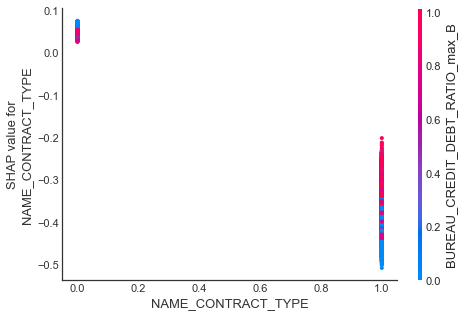

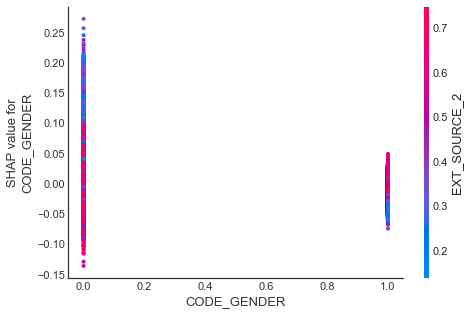

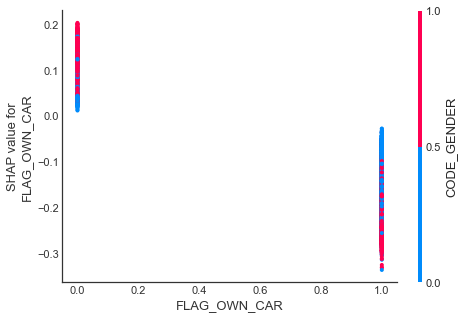

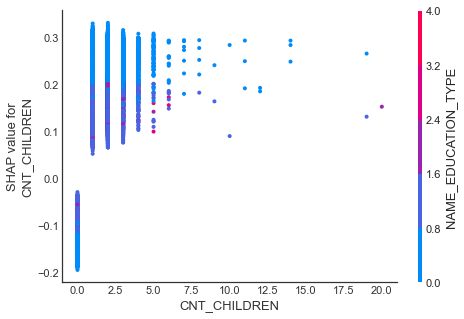

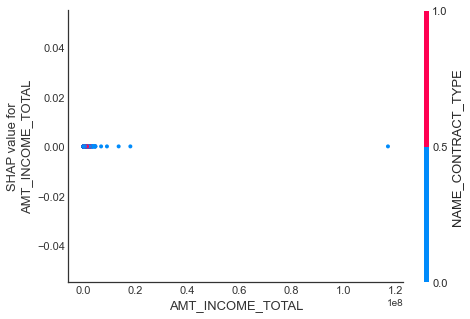

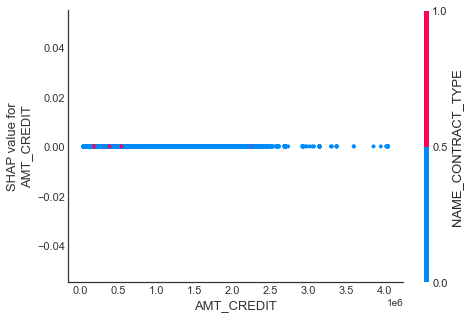

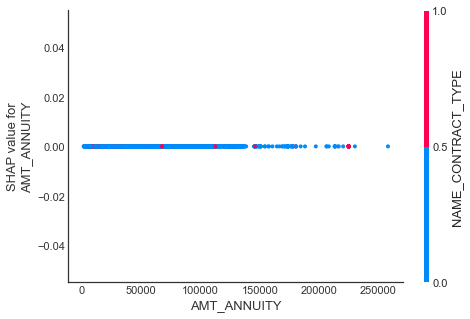

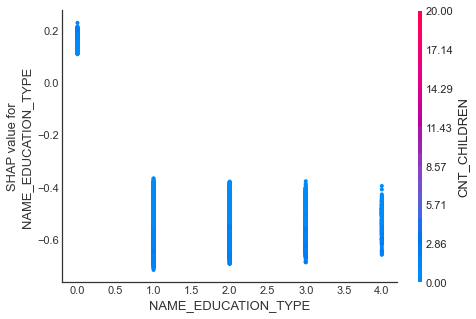

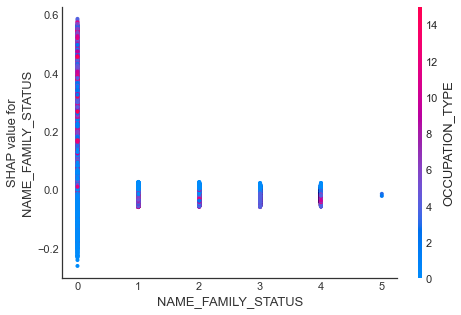

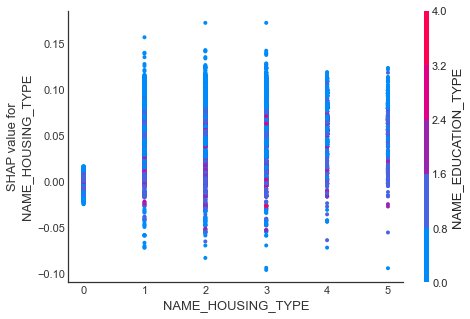

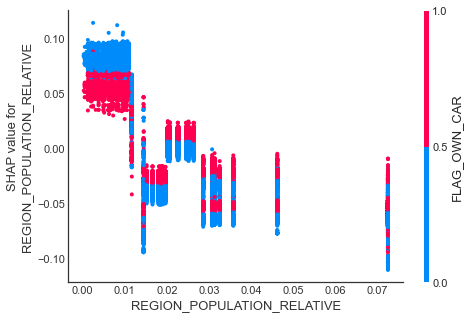

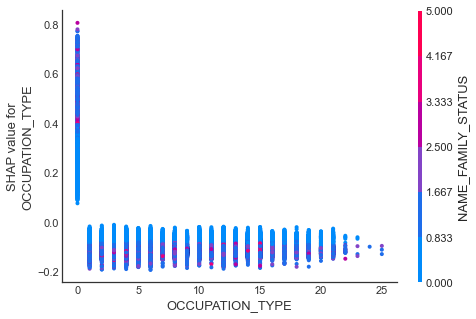

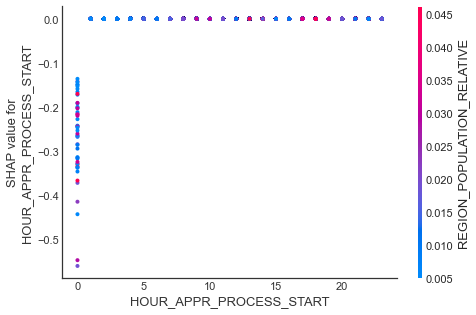

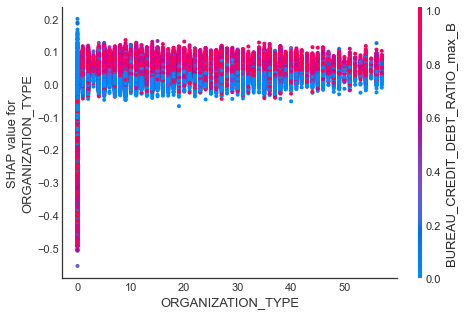

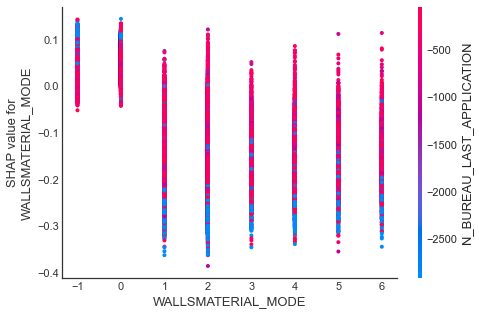

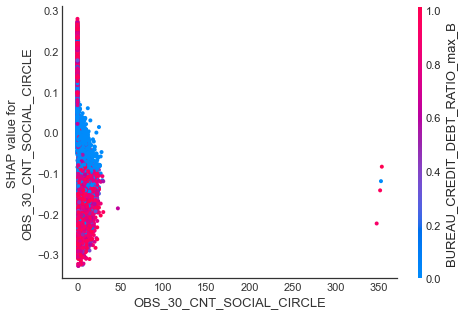

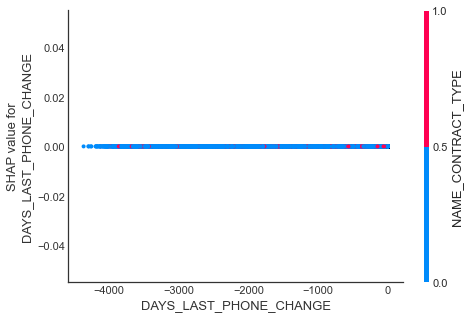

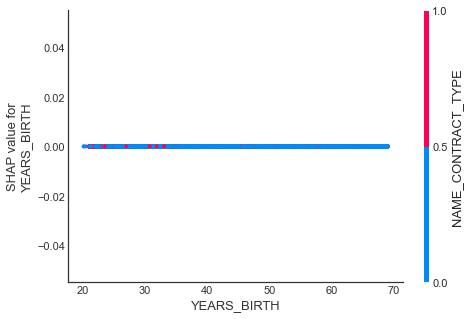

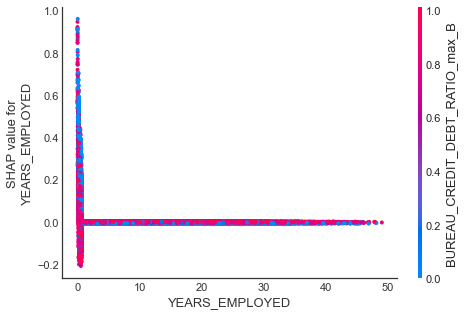

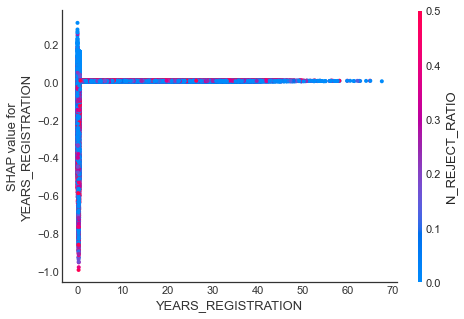

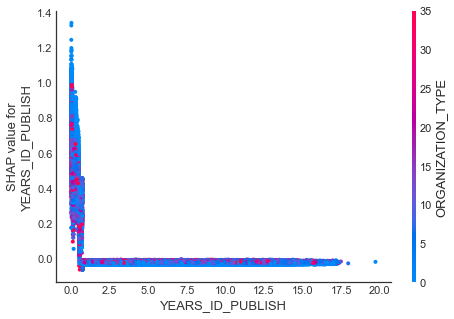

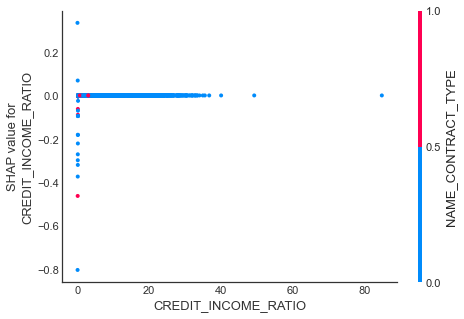

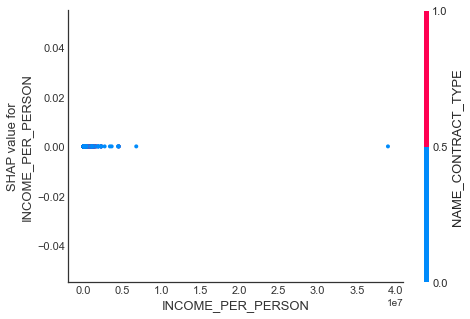

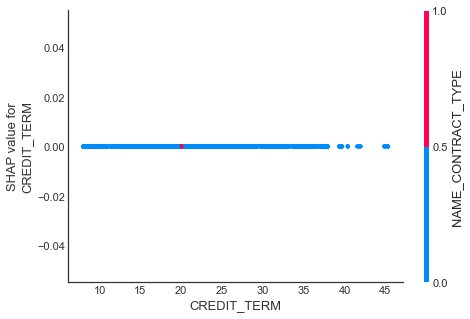

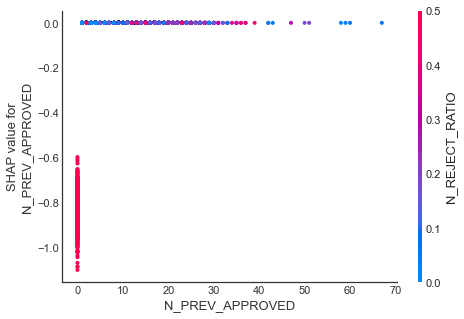

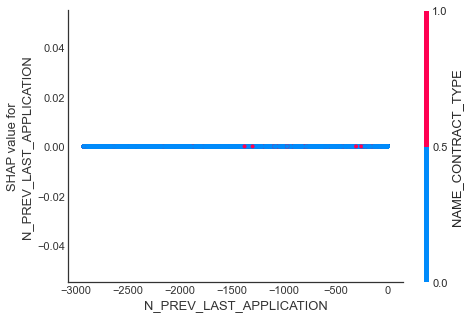

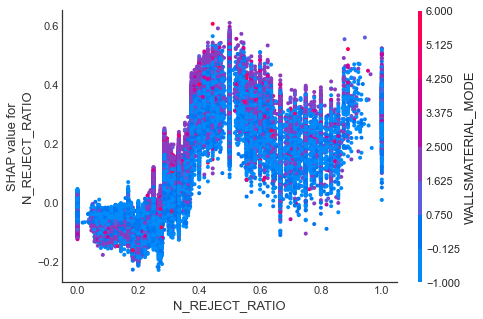

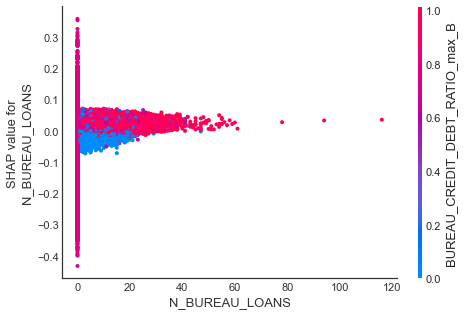

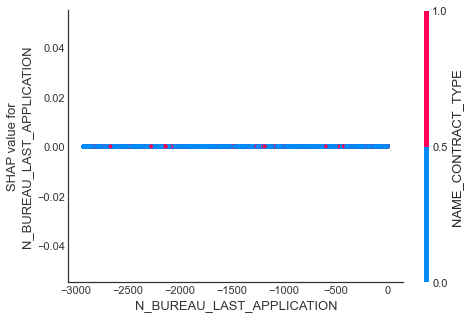

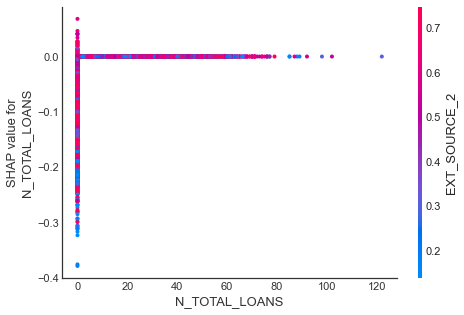

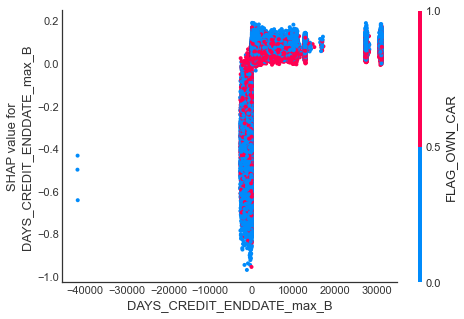

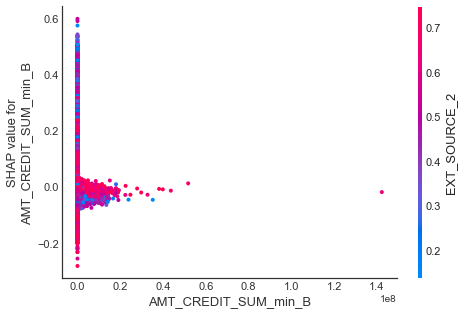

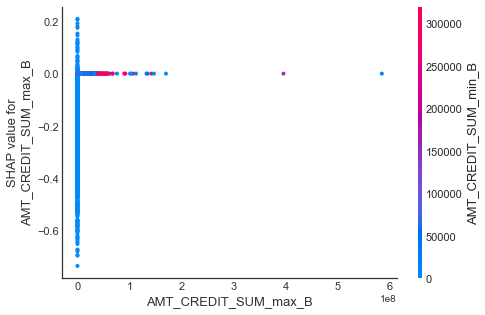

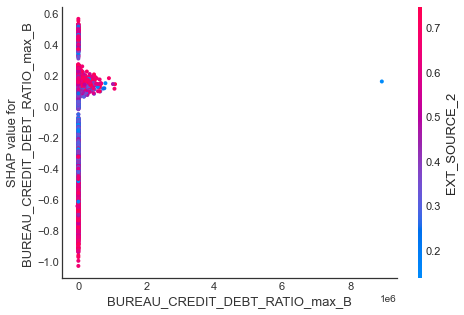

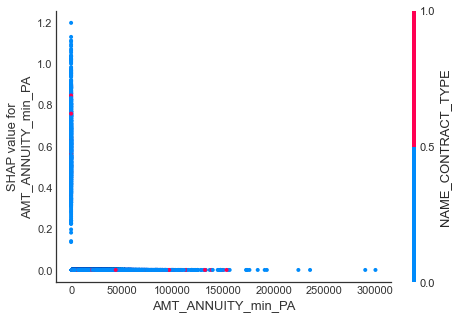

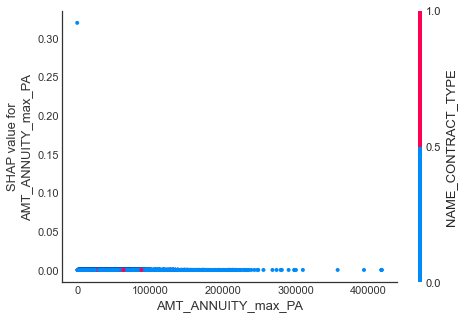

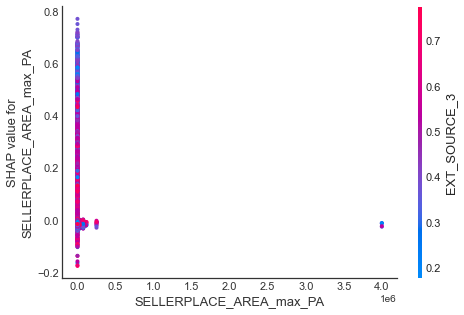

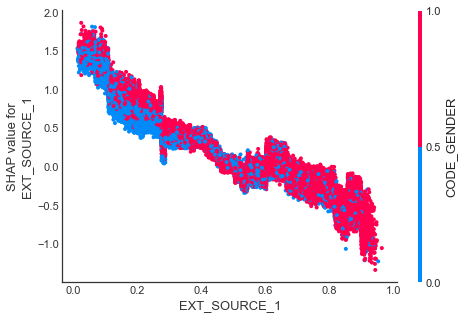

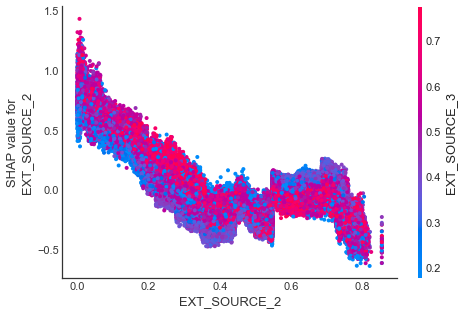

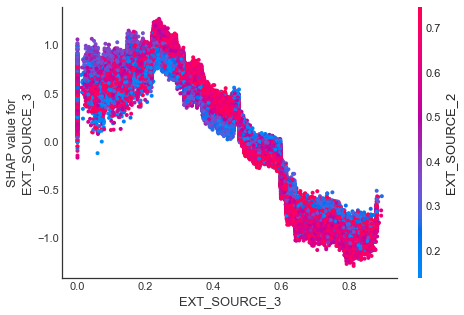

In [32]:
for col in im_data.columns.tolist():
    shap.dependence_plot(col, shap_values, im_data)

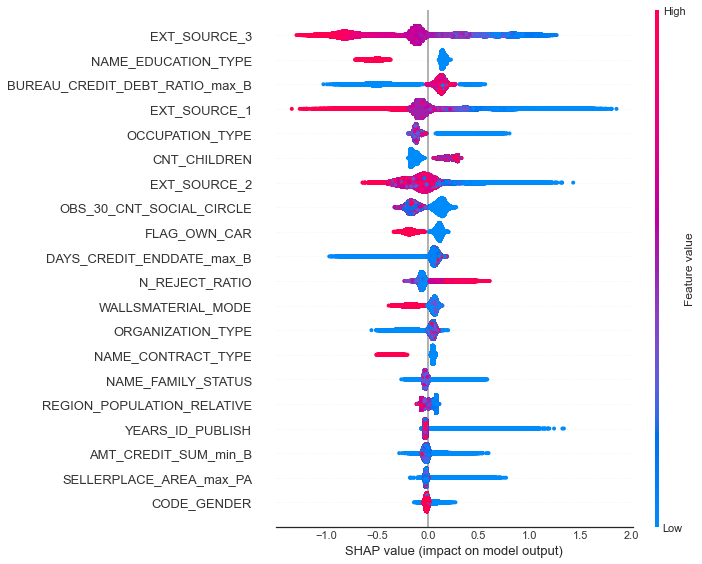

In [33]:
shap.summary_plot(shap_values, im_data)

- Low **EXT_SOURCE_1**, **EXT_SOURCE_2**, **EXT_SOURCE_3** increases the predicted **TARGET 0**.
- Credit term increases the **TARGET 1**. The more payment terms, higher the default risk.

In [34]:
# pickle.dump(explainer, open('lime_exp.sav', 'wb')) #Can't pickle lambda objects...
pickle.dump(explainer_shap, open('pickle/shap_exp.sav', 'wb'))
pickle.dump(shap_values, open('pickle/shap_val.pkl', 'wb'))